In [1]:
from neo4j import GraphDatabase
from sort_dataframeby_monthorweek import *
import pandas as pd
import numpy as np
import os
file_path = r'C:\Users\Shaun\PycharmProjects\untitled\data'

In [2]:
driver = GraphDatabase.driver("neo4j://localhost:7687", auth=("neo4j", "password"))
session = driver.session()

In [3]:
result = session.run("match (b)-[:IN_MONTH]-(c:Month) return c.month as month, labels(b)[0] as offence, sum(toInteger(b.convictions)) as convictions, avg(toInteger(b.percentConvictions)) as percent_convictions, sum(toInteger(b.unsuccessful)) as unsuccessful, avg(toInteger(b.percentUnsuccessful)) as percent_unsuccessful")

In [4]:
df = pd.DataFrame([r.values() for r in result], columns=result.keys())

In [5]:
df_sort = Sort_Dataframeby_Month(df=df,monthcolumnname='month')
df_sort['index'] = np.arange(len(df_sort))
df_sort = df_sort.sort_values(by=['offence', 'index'])

In [6]:
print(df_sort)

        month           offence  convictions  percent_convictions  \
9        July    AdminFinalised            0                  NaN   
19     August    AdminFinalised            0                  NaN   
29  September    AdminFinalised            0                  NaN   
45    October    AdminFinalised            0                  NaN   
67   November    AdminFinalised            0                  NaN   
..        ...               ...          ...                  ...   
24     August  TheftAndHandling         6192            92.272727   
28  September  TheftAndHandling         5895            92.090909   
54    October  TheftAndHandling         6391            92.636364   
66   November  TheftAndHandling         6467            93.136364   
75   December  TheftAndHandling         5134            92.227273   

    unsuccessful  percent_unsuccessful  index  
9           2475                   NaN      9  
19          2844                   NaN     19  
29          2982           

In [7]:
df_plot = df_sort[['offence', 'month', 'percent_convictions']]

In [8]:
print(df_plot)

             offence      month  percent_convictions
9     AdminFinalised       July                  NaN
19    AdminFinalised     August                  NaN
29    AdminFinalised  September                  NaN
45    AdminFinalised    October                  NaN
67    AdminFinalised   November                  NaN
..               ...        ...                  ...
24  TheftAndHandling     August            92.272727
28  TheftAndHandling  September            92.090909
54  TheftAndHandling    October            92.636364
66  TheftAndHandling   November            93.136364
75  TheftAndHandling   December            92.227273

[84 rows x 3 columns]


In [9]:
df_test = df_plot

In [10]:
df_test = df_test.pivot(index='month', columns='offence', values='percent_convictions')
order = ['July', 'August', 'September','October', 'November', 'December']
df_test = df_test.reindex(order)

In [11]:
print(df_test)

offence    AdminFinalised  AgainstThePerson   Burglary  CriminalDamage  \
month                                                                    
July                  NaN         80.568182  89.000000       89.863636   
August                NaN         80.818182  85.750000       88.568182   
September             NaN         79.818182  88.250000       87.386364   
October               NaN         80.159091  88.681818       87.227273   
November              NaN         79.931818  88.068182       84.750000   
December              NaN         80.681818  88.954545       85.295455   

offence        Drugs  FraudAndForgery   Homicide  LMotoringOffences  \
month                                                                 
July       93.636364        88.568182  86.852941                NaN   
August     93.113636        87.522727  76.857143                NaN   
September  94.500000        85.636364  90.392857                NaN   
October    93.954545        88.590909  85.361111    

In [12]:
print(df_test)

offence    AdminFinalised  AgainstThePerson   Burglary  CriminalDamage  \
month                                                                    
July                  NaN         80.568182  89.000000       89.863636   
August                NaN         80.818182  85.750000       88.568182   
September             NaN         79.818182  88.250000       87.386364   
October               NaN         80.159091  88.681818       87.227273   
November              NaN         79.931818  88.068182       84.750000   
December              NaN         80.681818  88.954545       85.295455   

offence        Drugs  FraudAndForgery   Homicide  LMotoringOffences  \
month                                                                 
July       93.636364        88.568182  86.852941                NaN   
August     93.113636        87.522727  76.857143                NaN   
September  94.500000        85.636364  90.392857                NaN   
October    93.954545        88.590909  85.361111    

In [13]:
import matplotlib.pyplot as plt

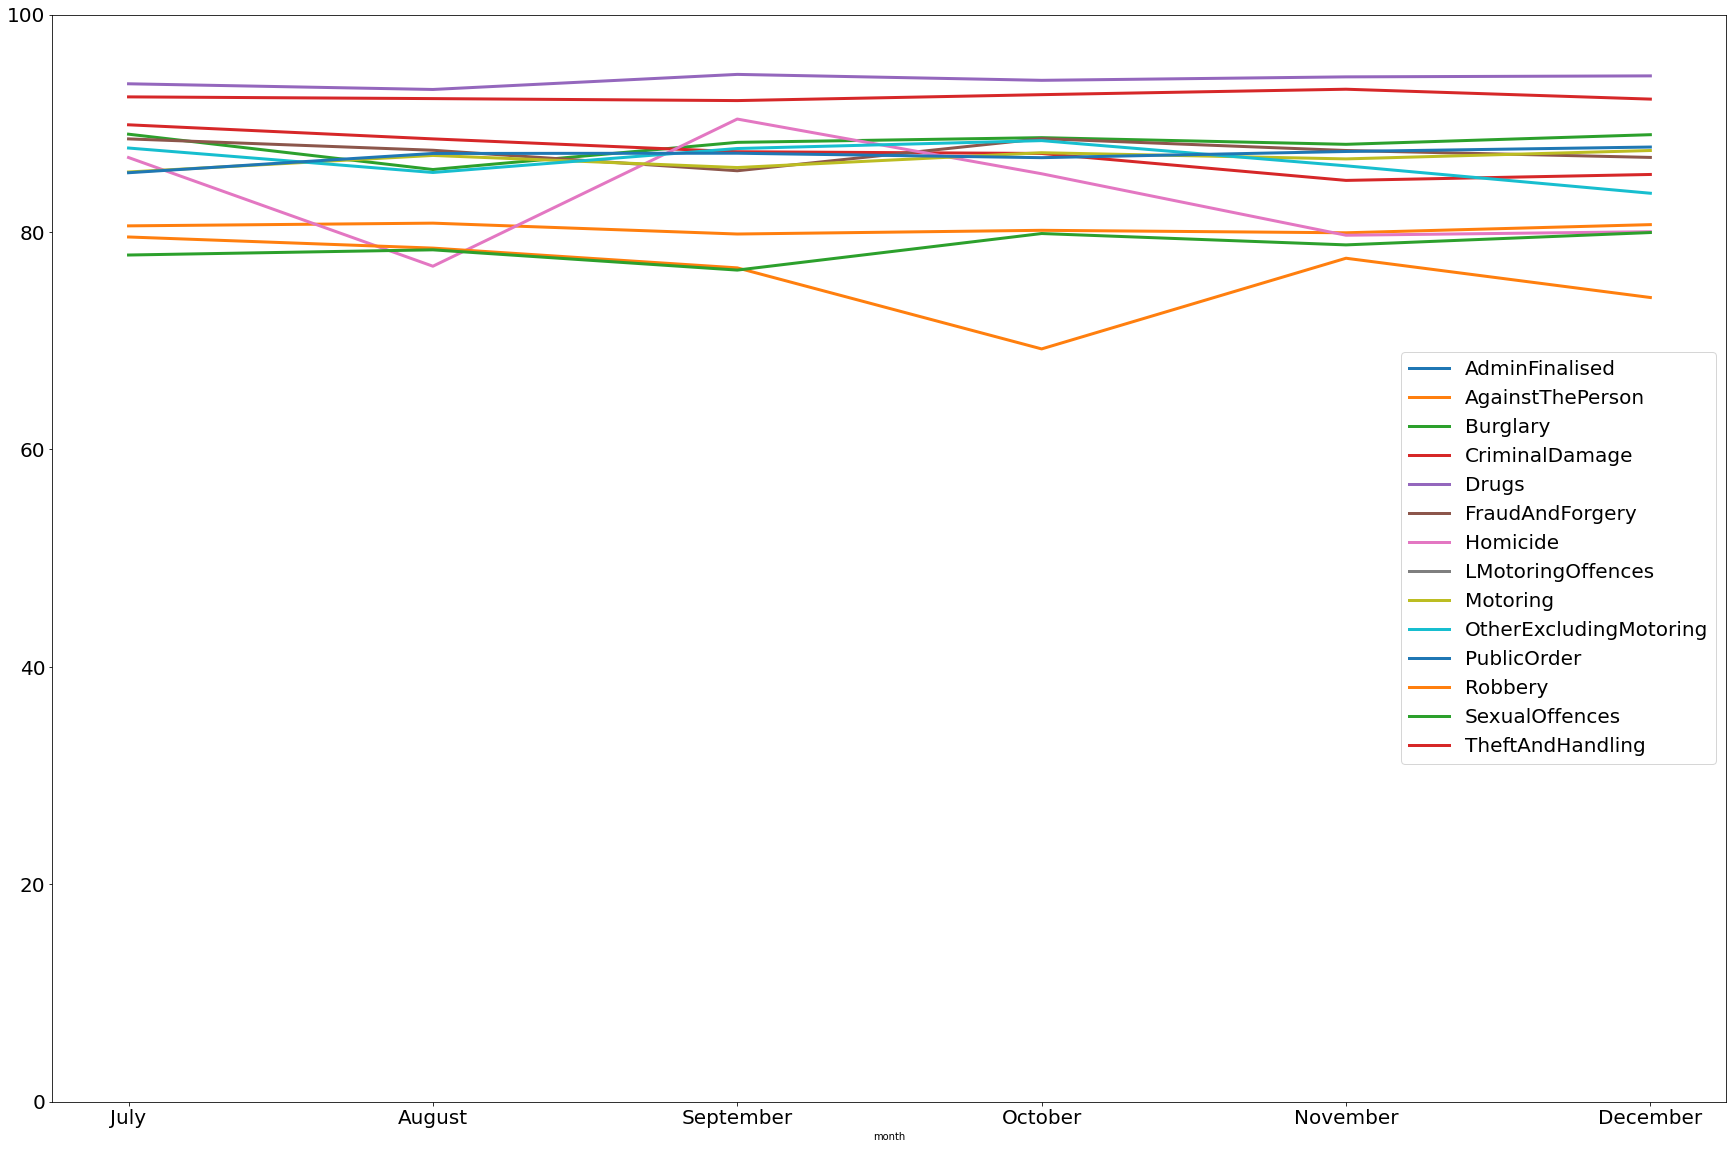

In [14]:
ax = df_test.plot.line(figsize=(30,20), fontsize=20,linewidth=3.0)
ax.set_ylim([0,100])
ax.legend(loc=7, prop={'size': 20})